# Importando base de dados

In [131]:
import pandas as pd

In [132]:
dados = pd.read_csv('dados/tips.csv')

In [133]:
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


# Tradução

In [134]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [135]:
renomear = {
    'total_bill' : 'valor_da_conta', 
    'tip' : 'gorjeta', 
    'dessert' : 'sobremesa', 
    'day' : 'dia_da_semana', 
    'time' : 'hora_do_dia', 
    'size': 'total_de_pessoas'
}

In [136]:
type(dados)

pandas.core.frame.DataFrame

In [137]:
gorjetas = dados.rename(columns = renomear)

In [138]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [139]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [140]:
sim_nao = {
    'No' : 'Não', 
    'Yes' : 'Sim'
}

In [141]:
gorjetas.sobremesa =  gorjetas.sobremesa.map(sim_nao)

In [142]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2


In [143]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [144]:
dias = {
        'Sun' : 'Domingo',
        'Sat' : 'Sábado',
        'Thur' : 'Quinta',
        'Fri' : 'Sexta'
}
type(dias)

dict

In [145]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)

In [146]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2


In [147]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [148]:
hora = {
    'Dinner' : 'Jantar', 
    'Lunch' : 'Almoço'
}

In [149]:
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)

In [150]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


# Importando o Seaborn

In [151]:
import seaborn as sns

In [152]:
!pip show seaborn

Name: seaborn
Version: 0.12.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: C:\Users\Jr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages
Requires: matplotlib, numpy, pandas
Required-by: 


# Análise 1 - Valor da conta e gorjeta

In [153]:
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

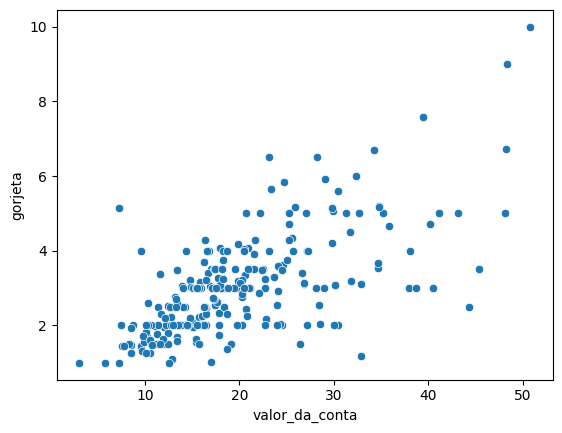

In [154]:
valor_gorjeta = sns.scatterplot(x='valor_da_conta', y='gorjeta', data=gorjetas)

##### Visualmente o valor da gorjeta aumenta conforme aumenta o valor da conta

In [155]:
print('A base de dados contém {} registros.'.format(gorjetas.shape[0]))
print('Registros não nulos')
gorjetas.count()

A base de dados contém 244 registros.
Registros não nulos


valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64

## Criando o campo porcentagem

In [156]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


In [157]:
gorjetas['porcentagem'] = gorjetas['gorjeta'] / gorjetas['valor_da_conta']

In [158]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.059447


In [159]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)

In [160]:
gorjetas.head(3)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17


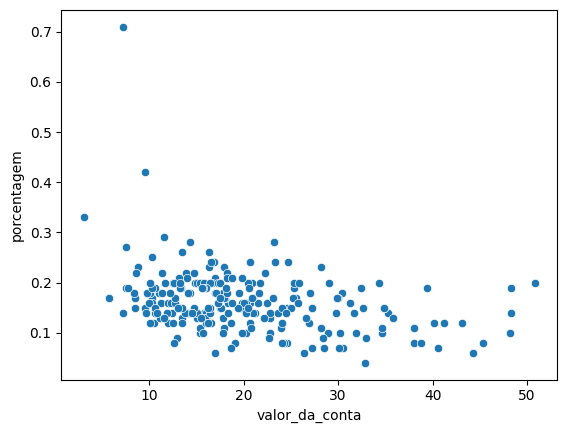

In [161]:
porcentagem_conta = sns.scatterplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

##### Visualmente o valor da conta não é proporcional ao valor da gorjeta

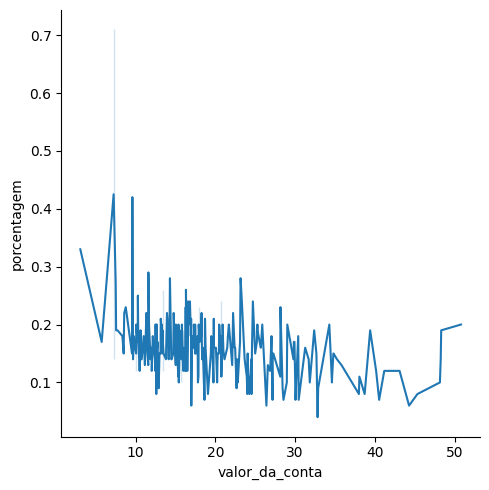

In [162]:
porcentagem_conta_linha = sns.relplot(x='valor_da_conta', y='porcentagem', kind='line', data=gorjetas)

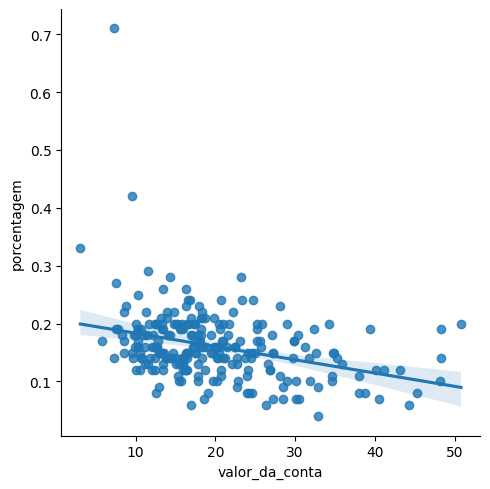

In [163]:
sns.lmplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

In [164]:
gorjetas[gorjetas.sobremesa == 'Sim'].describe().round(2)

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.00,93.00,93.00,93.00
mean,20.76,3.01,2.41,0.16
std,9.83,1.40,0.81,0.09
min,3.07,1.00,1.00,0.04
25%,13.42,2.00,2.00,0.11
50%,17.92,3.00,2.00,0.15
75%,26.86,3.68,3.00,0.20
max,50.81,10.00,5.00,0.71


In [165]:
gorjetas[gorjetas.sobremesa == 'Não'].describe().round(2)

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.00,151.00,151.00,151.00
mean,19.19,2.99,2.67,0.16
std,8.26,1.38,1.02,0.04
min,7.25,1.00,1.00,0.06
25%,13.32,2.00,2.00,0.14
50%,17.59,2.74,2.00,0.16
75%,22.76,3.50,3.00,0.18
max,48.33,9.00,6.00,0.29


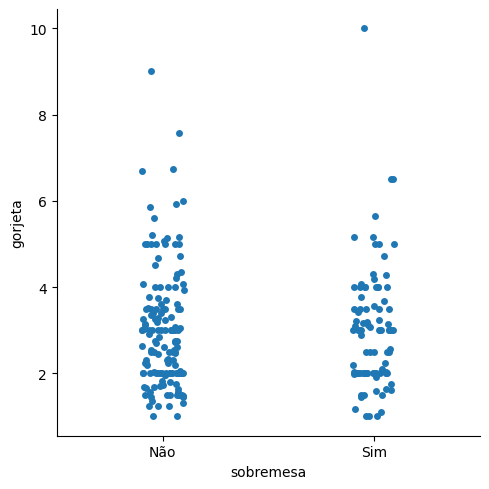

In [166]:
sns.catplot(x='sobremesa', y='gorjeta', data=gorjetas)

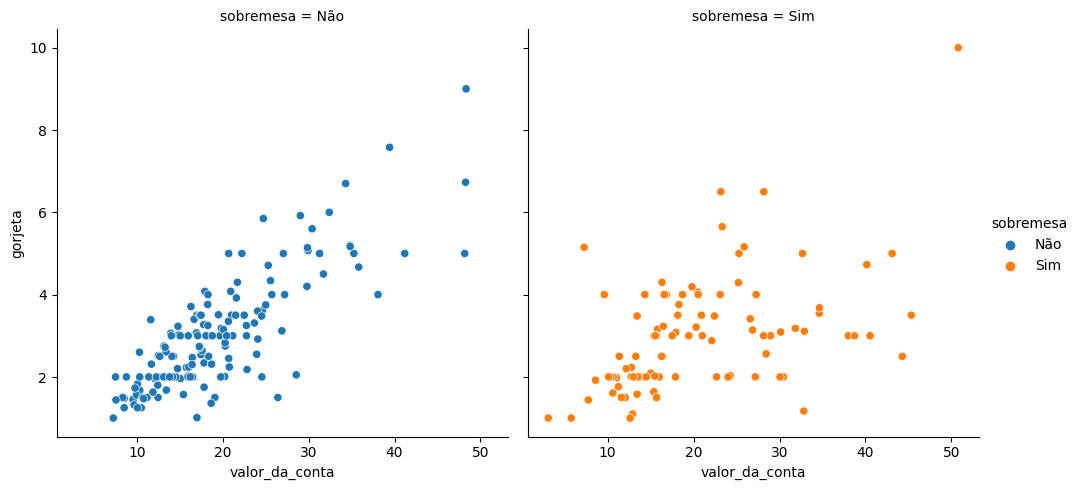

In [167]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data=gorjetas)

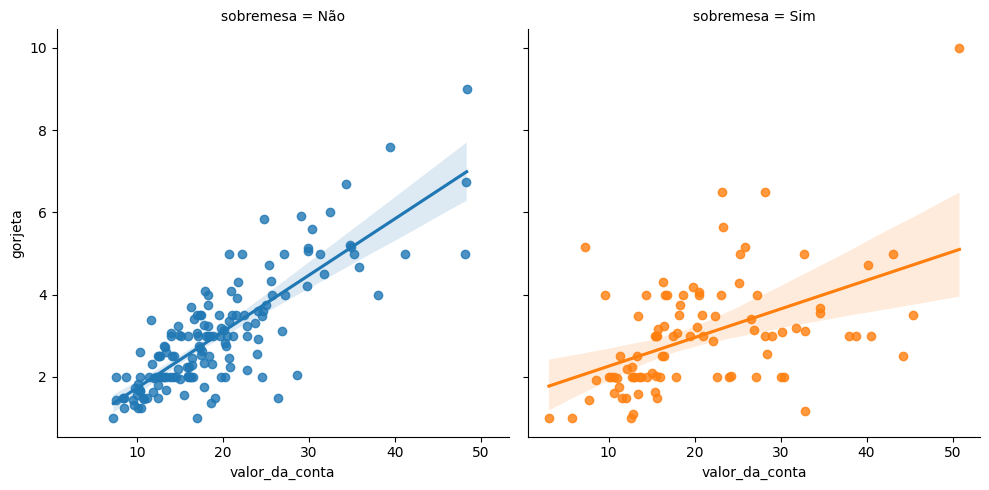

In [168]:
sns.lmplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data=gorjetas)

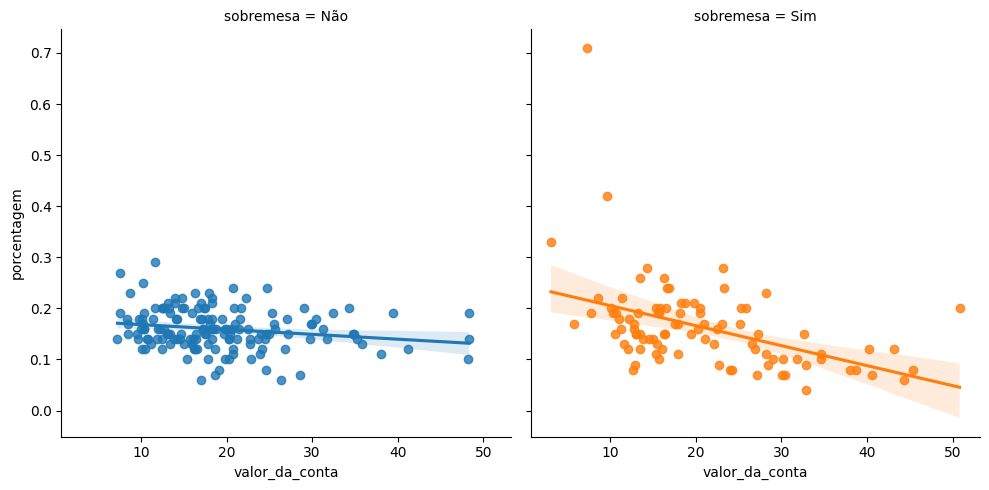

In [169]:
sns.lmplot(x='valor_da_conta', y='porcentagem', hue='sobremesa', col='sobremesa', data=gorjetas)

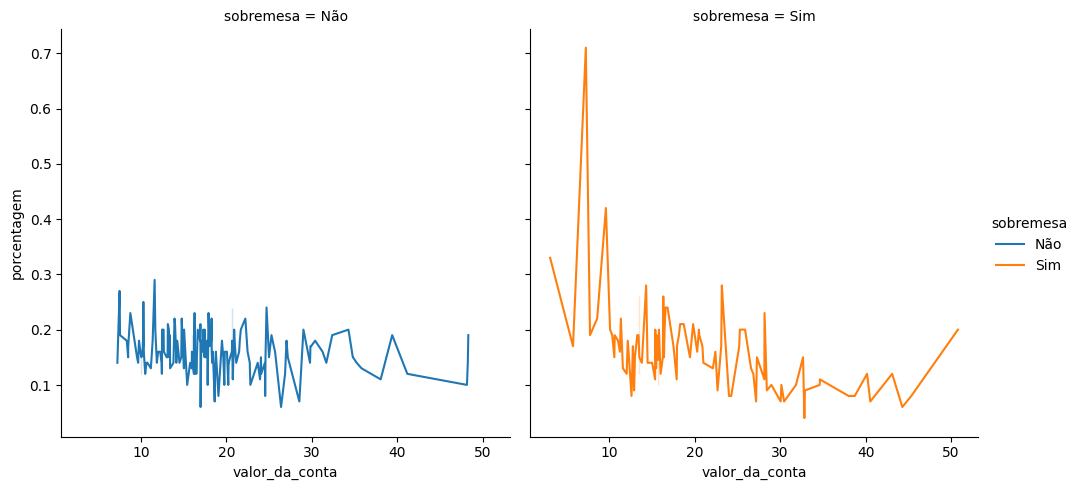

In [170]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='sobremesa', col='sobremesa', kind='line', data=gorjetas)

##### Visualmente, existe uma diferença no valor da gorjeta daqueles que pediram sobremesa e não pediram sobremesa

## Teste de hipótese

**H<sup>null</sup>**
>**A distribuição da taxa da gorjeta é a mesma nos dois grupos**

**H<sup>alt</alt>**
>**A distribuição da taxa da gorjeta não é a mesma nos dois grupos**

In [171]:
from scipy.stats import ranksums

In [172]:
sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem

In [173]:
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem

In [174]:
r = ranksums(sobremesa, sem_sobremesa)

In [175]:
print('O valor do p-value é {}'.format(r.pvalue))

O valor do p-value é 0.5266635660124415


**A distribuição da taxa de gorjetas é a mesma nos dois grupos**

# Análise 3 - Dia da semana

In [176]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [177]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

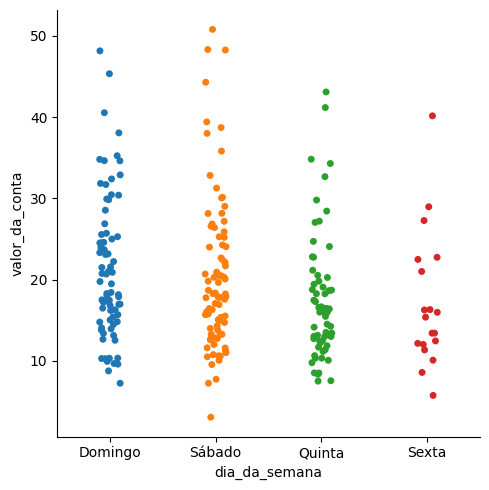

In [178]:
sns.catplot(x='dia_da_semana', y='valor_da_conta', hue='dia_da_semana', data=gorjetas)

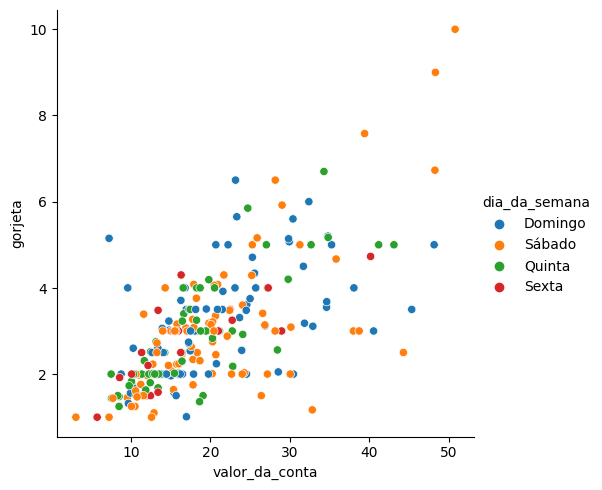

In [179]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', data=gorjetas)

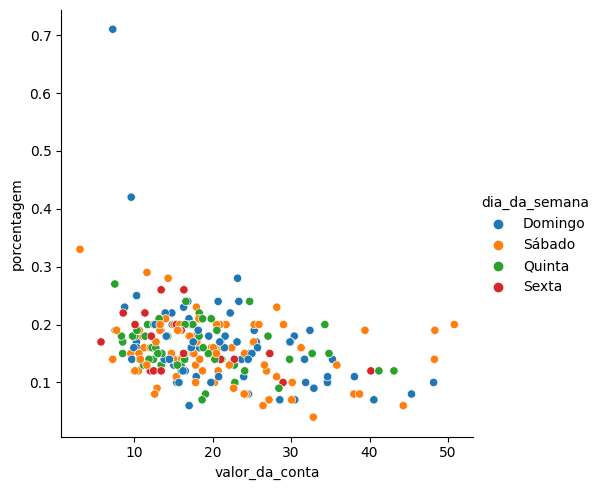

In [180]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', data=gorjetas)

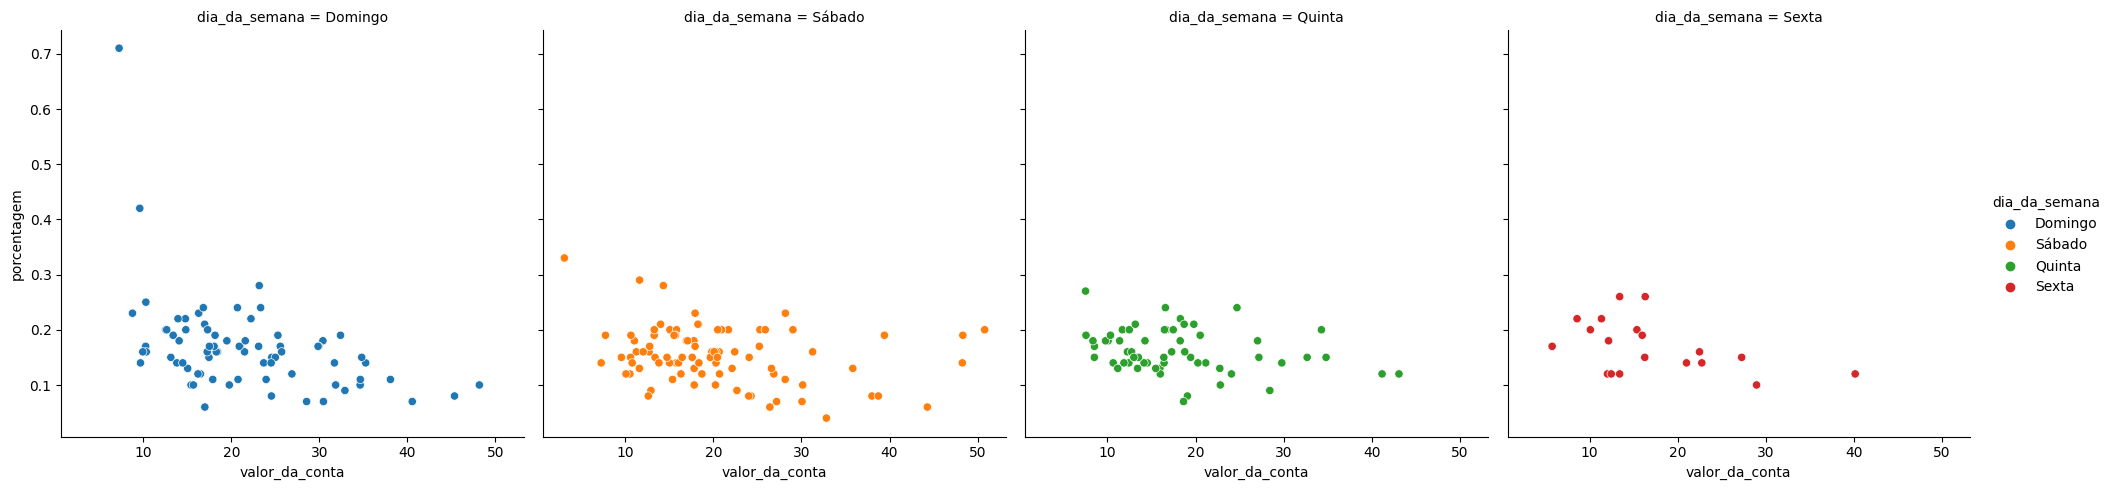

In [181]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

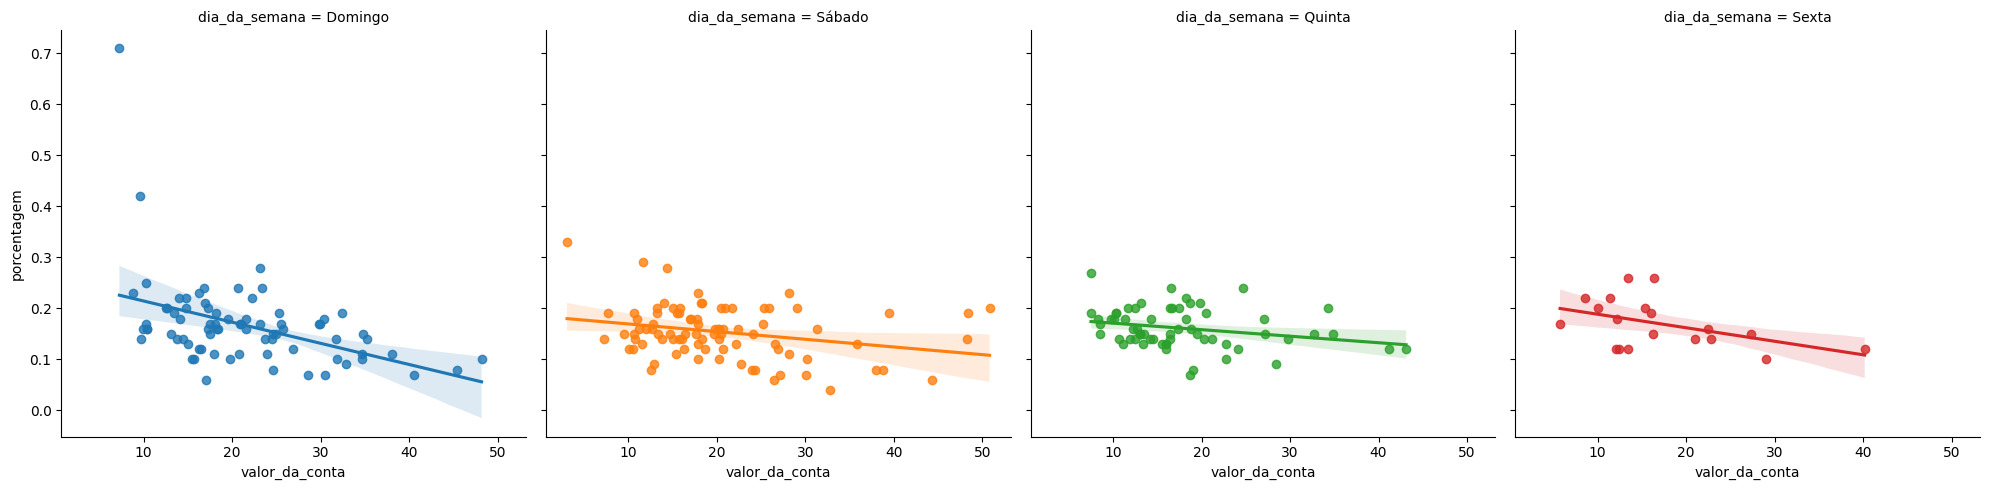

In [182]:
sns.lmplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

In [183]:
media_geral_gorjetas = gorjetas.gorjeta.mean()

In [184]:
print('A média geral das gorjetas é de {}'.format(media_geral_gorjetas))

A média geral das gorjetas é de 2.99827868852459


In [187]:
gorjetas.groupby(['dia_da_semana']).mean(numeric_only=True)

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
dia_da_semana,,,,
Domingo,21.410000,3.255132,2.842105,0.166974
Quinta,17.682742,2.771452,2.451613,0.161129
Sexta,17.151579,2.734737,2.105263,0.169474
Sábado,20.441379,2.993103,2.517241,0.153678


In [190]:
gorjetas.groupby(['dia_da_semana']).mean(numeric_only=True)[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sexta,17.151579,2.734737,0.169474
Sábado,20.441379,2.993103,0.153678


In [192]:
print('Frequência dos dias')
gorjetas.dia_da_semana.value_counts()

Frequência dos dias


dia_da_semana
Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: count, dtype: int64

## Teste de hipótese


**H<sup>null</sup>**
>**A distribuição do valor da conta é igual no sábado e no domingo

**H<sup>alt</sup>**
>**A distribuição do valor da conta não é igual no sábado e no domingo

In [198]:
valor_conta_domingo = gorjetas.query("dia_da_semana == 'Domingo'").valor_da_conta

In [199]:
valor_conta_sabado = gorjetas.query("dia_da_semana == 'Sábado'").valor_da_conta

In [201]:
r2 = ranksums(valor_conta_domingo, valor_conta_sabado)
print('O valor do p-value é {}'.format(r2.pvalue))

O valor do p-value é 0.3576728477868443


**H<sup>null</sup>**
>**A distribuição do valor da conta é igual no sábado e no domingo**